In [2]:
# 1. Imports and Setup
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, ConfusionMatrixDisplay
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# 2. Load Data
# Adjust paths as needed
data_dir = './results'
train_path = f"{data_dir}/llama_train_features.csv"
test_path  = f"{data_dir}/llama_test_features.csv"

train_df = pd.read_csv(train_path)
test_df  = pd.read_csv(test_path)

In [4]:
# Extract feature columns and labels
feature_cols = [c for c in train_df.columns if c.startswith('hidden_')]
X_train = train_df[feature_cols].values
y_train = train_df['label'].values
X_test  = test_df[feature_cols].values
y_test  = test_df['label'].values

In [11]:
# 3. Train Linear Probe
probe = LogisticRegression(multi_class='multinomial', max_iter=1000)
probe.fit(X_train, y_train)

# 4. Overall Evaluation
# Predict on test set
y_pred = probe.predict(X_test)

print("Overall Classification Report:")
print(classification_report(y_test, y_pred, target_names=ordered_labels))

acc = accuracy_score(y_test, y_pred)
print(f"Overall Accuracy: {acc * 100:.2f}%")

/auto/brno2/home/ariuka/tense/venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Overall Classification Report:
              precision    recall  f1-score   support

        past       0.96      0.96      0.96      1549
     present       0.91      0.91      0.91      1549
      future       0.90      0.90      0.90      1548

    accuracy                           0.92      4646
   macro avg       0.92      0.92      0.92      4646
weighted avg       0.92      0.92      0.92      4646

Overall Accuracy: 92.27%


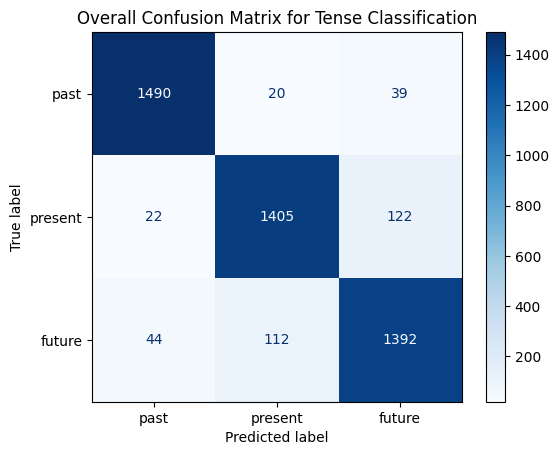

In [12]:
# 5. Overall Confusion Matrix Visualization
ordered_labels = ['past', 'present', 'future']

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=ordered_labels)
disp.plot(cmap=plt.cm.Blues)
plt.title("Overall Confusion Matrix for Tense Classification")
plt.show()


Language: en
              precision    recall  f1-score   support

        past       0.98      0.98      0.98       200
     present       0.97      0.93      0.95       200
      future       0.93      0.97      0.95       200

    accuracy                           0.96       600
   macro avg       0.96      0.96      0.96       600
weighted avg       0.96      0.96      0.96       600

Accuracy (en): 0.9600


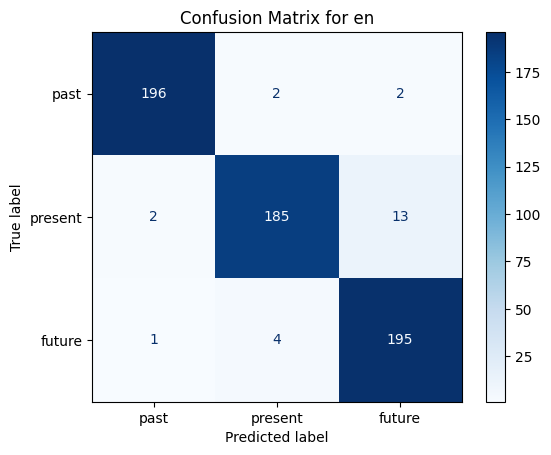


Language: de
              precision    recall  f1-score   support

        past       0.92      0.97      0.94       200
     present       0.83      0.82      0.82       200
      future       0.81      0.77      0.79       200

    accuracy                           0.85       600
   macro avg       0.85      0.85      0.85       600
weighted avg       0.85      0.85      0.85       600

Accuracy (de): 0.8550


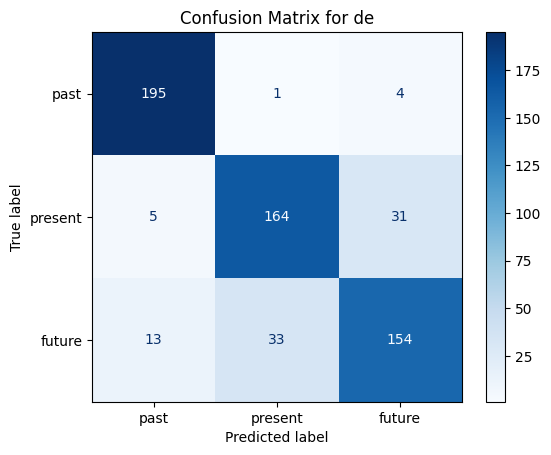


Language: fr
              precision    recall  f1-score   support

        past       0.95      0.88      0.91       200
     present       0.89      0.91      0.90       200
      future       0.86      0.90      0.88       200

    accuracy                           0.90       600
   macro avg       0.90      0.90      0.90       600
weighted avg       0.90      0.90      0.90       600

Accuracy (fr): 0.8967


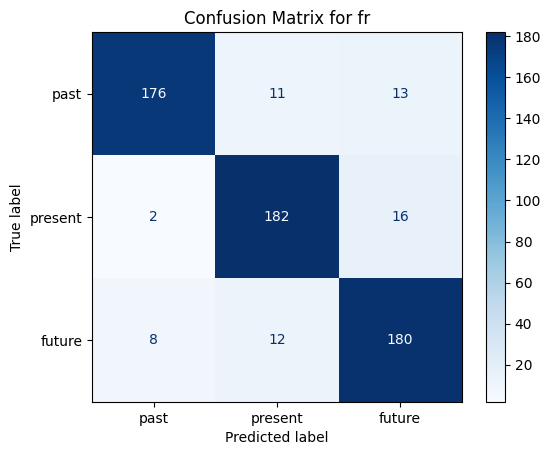


Language: it
              precision    recall  f1-score   support

        past       0.95      0.97      0.96       200
     present       0.89      0.86      0.88       200
      future       0.86      0.87      0.87       200

    accuracy                           0.90       600
   macro avg       0.90      0.90      0.90       600
weighted avg       0.90      0.90      0.90       600

Accuracy (it): 0.9000


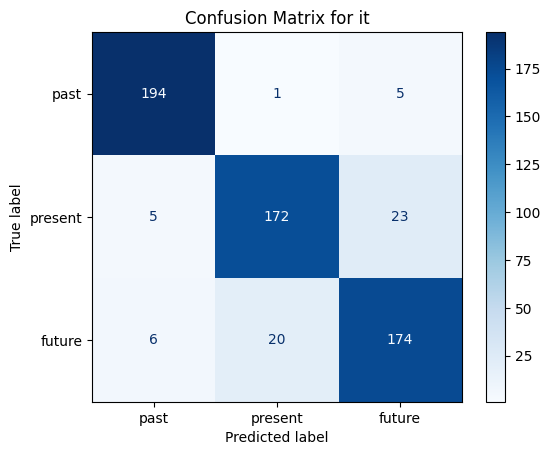


Language: pt
              precision    recall  f1-score   support

        past       0.95      0.95      0.95       200
     present       0.92      0.93      0.92       200
      future       0.90      0.90      0.90       200

    accuracy                           0.93       600
   macro avg       0.93      0.92      0.93       600
weighted avg       0.93      0.93      0.93       600

Accuracy (pt): 0.9250


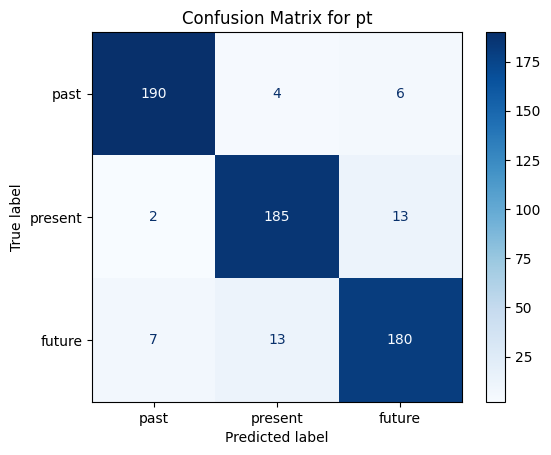


Language: es
              precision    recall  f1-score   support

        past       0.95      0.96      0.96       200
     present       0.88      0.87      0.88       200
      future       0.87      0.86      0.87       200

    accuracy                           0.90       600
   macro avg       0.90      0.90      0.90       600
weighted avg       0.90      0.90      0.90       600

Accuracy (es): 0.9000


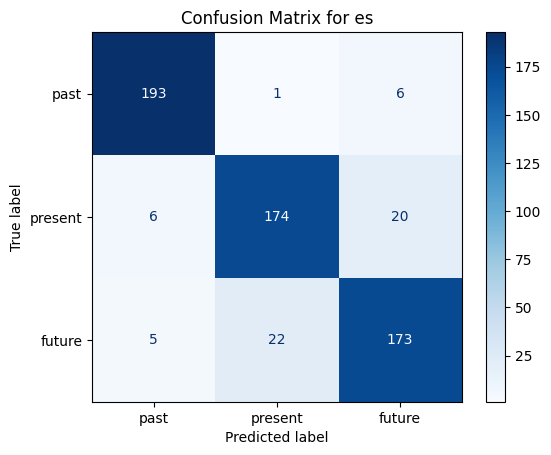


Language: hi
              precision    recall  f1-score   support

        past       1.00      0.99      1.00       200
     present       0.99      0.99      0.99       200
      future       0.99      0.99      0.99       200

    accuracy                           0.99       600
   macro avg       0.99      0.99      0.99       600
weighted avg       0.99      0.99      0.99       600

Accuracy (hi): 0.9933


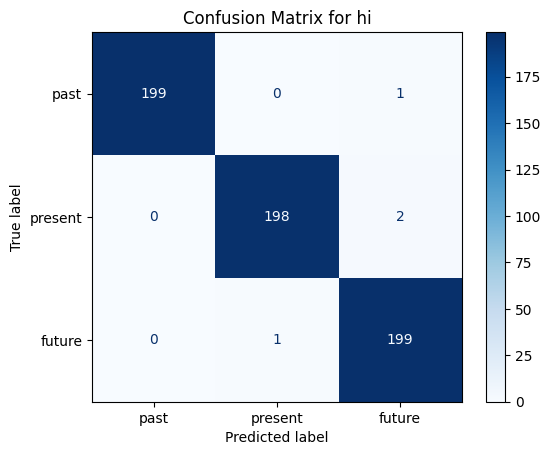


Language: th
              precision    recall  f1-score   support

        past       0.97      0.99      0.98       149
     present       0.95      0.97      0.96       149
      future       0.96      0.93      0.94       148

    accuracy                           0.96       446
   macro avg       0.96      0.96      0.96       446
weighted avg       0.96      0.96      0.96       446

Accuracy (th): 0.9619


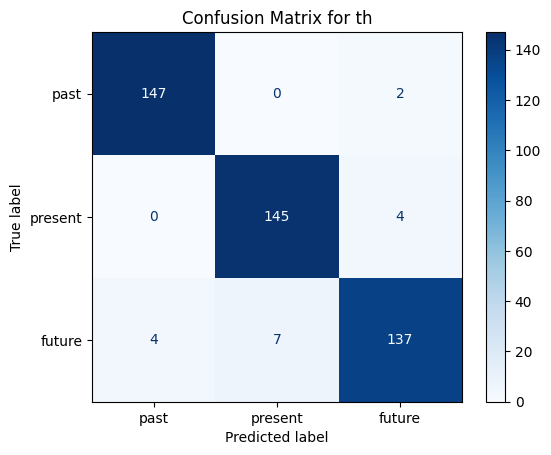

In [13]:
# 6. Language-Specific Confusion Matrices
# Assuming dataset has a `language` column indicating language of each example
if 'language' in test_df.columns:
    languages = test_df['language'].unique()
    for lang in languages:
        # Filter data by language
        idx = test_df['language'] == lang
        y_true_lang = y_test[idx]
        y_pred_lang = probe.predict(X_test[idx])

        print(f"\nLanguage: {lang}")
        # Classification report and accuracy
        print(classification_report(y_true_lang, y_pred_lang, target_names=ordered_labels))
        print(f"Accuracy ({lang}): {accuracy_score(y_true_lang, y_pred_lang):.4f}")

        # Confusion matrix
        cm_lang = confusion_matrix(y_true_lang, y_pred_lang)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm_lang, display_labels=ordered_labels)
        disp.plot(cmap=plt.cm.Blues)
        plt.title(f'Confusion Matrix for {lang}')
        plt.show()
else:
    print("No 'language' column found in test data. Please include a 'language' column for per-language analysis.")

In [ ]:
inputs = tokenizer(
    words,                         # your sentence split on whitespace
    is_split_into_words=True, 
    return_tensors="pt", 
    return_word_ids=True
)
word_ids = inputs.word_ids(batch_index=0)  # list of word‐indices per token
verb_token_idxs = [i for i,w in enumerate(word_ids) if w == verb_index]
